In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sukhioo7/dataset/refs/heads/main/Car.csv?raw=True')

In [3]:
data.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
data.isnull().sum()

Unnamed: 0         0
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           221
seats            221
dtype: int64

In [5]:
data = data.drop(columns=['Unnamed: 0'],axis=1)

In [6]:
data = data.drop(columns=['name','torque','seats'],axis=1)

In [7]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp


In [8]:
data['mileage'] = data['mileage'].str.extract('(\d+\.\d+|\d+)')  # Extract only numeric part
data['mileage'] = data['mileage'].astype(float)  # Convert to float

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\RENU\AppData\Local\Temp\ipykernel_5648\2971786516.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['mileage'] = data['mileage'].str.extract('(\d+\.\d+|\d+)')  # Extract only numeric part


In [9]:
data['engine'] = data['engine'].str.extract('(\d+\.\d+|\d+)').astype(float)
data['max_power'] = data['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\RENU\AppData\Local\Temp\ipykernel_5648\2408439694.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['engine'] = data['engine'].str.extract('(\d+\.\d+|\d+)').astype(float)
C:\Users\RENU\AppData\Local\Temp\ipykernel_5648\2408439694.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['max_power'] = data['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)


In [10]:
data['mileage'] = data['mileage'].fillna(data['mileage'].median())
data['engine'] = data['engine'].fillna(data['engine'].median())
data['max_power'] = data['max_power'].fillna(data['max_power'].median())

In [31]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,2014,450000,145500,1,1,0,0,23.40,1248.0,74.00
1,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52
2,2006,158000,140000,0,1,0,2,17.70,1497.0,78.00
3,2010,225000,127000,1,1,0,0,23.00,1396.0,90.00
4,2007,130000,120000,0,1,0,0,16.10,1298.0,88.20


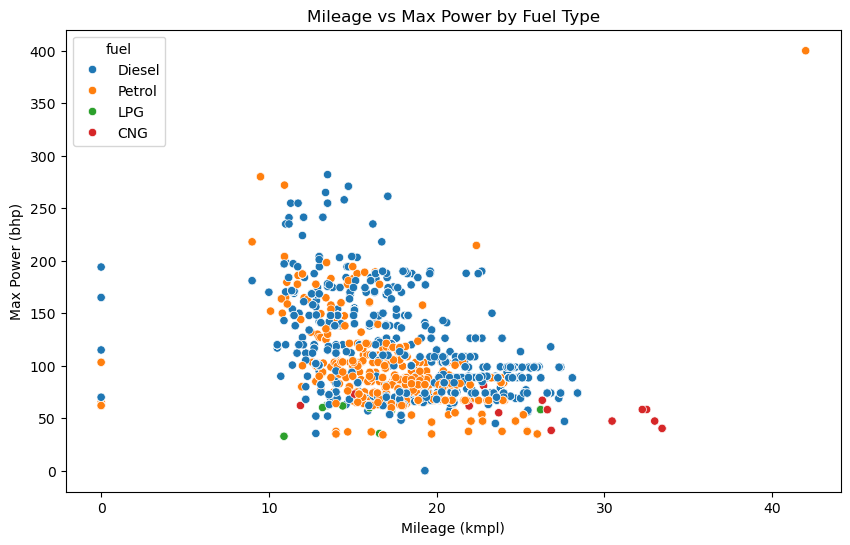

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='mileage', y='max_power',hue='fuel')

plt.xlabel("Mileage (kmpl)")
plt.ylabel("Max Power (bhp)")
plt.title("Mileage vs Max Power by Fuel Type")
plt.show()

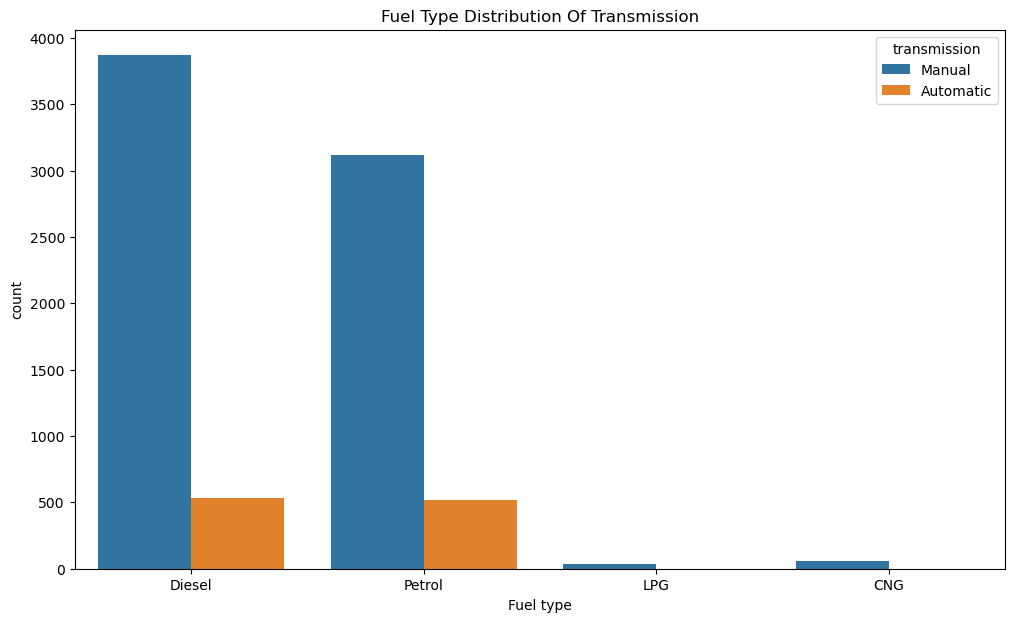

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(data=data,x='fuel',hue='transmission')
plt.title('Fuel Type Distribution Of Transmission')
plt.xlabel('Fuel type')
plt.ylabel('count')
plt.show()

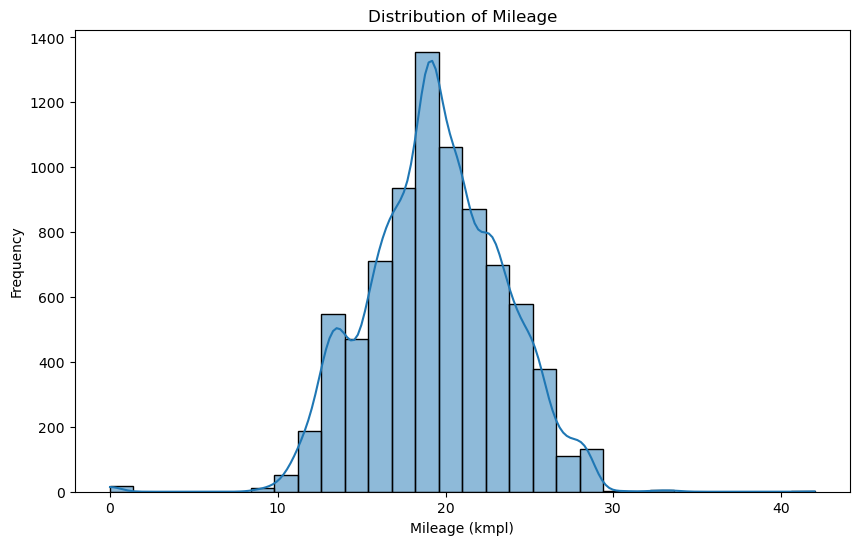

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='mileage', bins=30, kde=True)

plt.xlabel("Mileage (kmpl)")
plt.ylabel("Frequency")
plt.title("Distribution of Mileage")
plt.show()

In [14]:
data.replace({'fuel':{'Petrol':0 ,'Diesel':1, 'LPG':2,'CNG':3}},inplace=True)
data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Fifth':4,'Test Drive Car':5}},inplace=True)

C:\Users\RENU\AppData\Local\Temp\ipykernel_5648\4084048910.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'fuel':{'Petrol':0 ,'Diesel':1, 'LPG':2,'CNG':3}},inplace=True)
C:\Users\RENU\AppData\Local\Temp\ipykernel_5648\4084048910.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
C:\Users\RENU\AppData\Local\Temp\ipykernel_5648\4084048910.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [15]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,2014,450000,145500,1,1,0,0,23.40,1248.0,74.00
1,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52
2,2006,158000,140000,0,1,0,2,17.70,1497.0,78.00
3,2010,225000,127000,1,1,0,0,23.00,1396.0,90.00
4,2007,130000,120000,0,1,0,0,16.10,1298.0,88.20


# Splitting Our Data Into Training And Testing

In [16]:
X = data.drop(columns=['selling_price'])
Y = data['selling_price']

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Applying Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [19]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

# Apply Lasso

In [20]:
from sklearn.linear_model import Lasso
ls = Lasso()

In [21]:
ls.fit(X_train,Y_train)

Lasso()

# Making Prediction

In [22]:
train_prediction = linear_regression.predict(X_train)

In [23]:
from sklearn import metrics

In [24]:
error_score = metrics.r2_score(Y_train,train_prediction)

In [25]:
error_score

0.6778136540733702

In [26]:
training_error_score = metrics.r2_score(Y_train,train_prediction)

In [27]:
training_error_score

0.6778136540733702

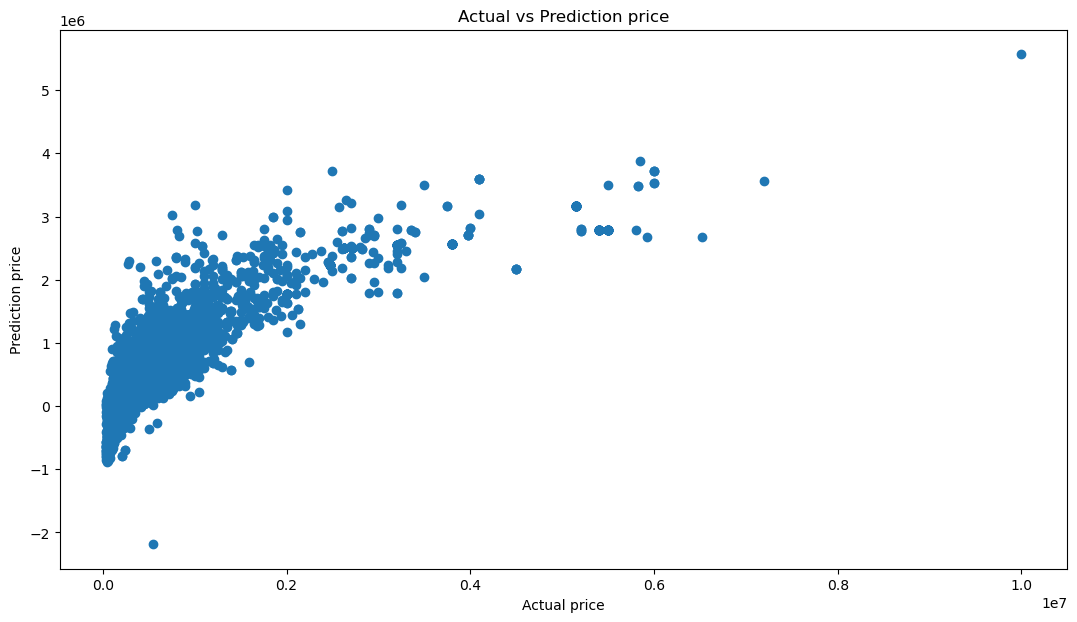

In [28]:
plt.figure(figsize=(13,7))
plt.scatter(Y_train,train_prediction)
plt.xlabel('Actual price')
plt.ylabel('Prediction price')
plt.title('Actual vs Prediction price')
plt.show()

In [29]:
prediction = linear_regression.predict(X_test)

In [32]:
test_error_score = metrics.r2_score(Y_test,prediction)

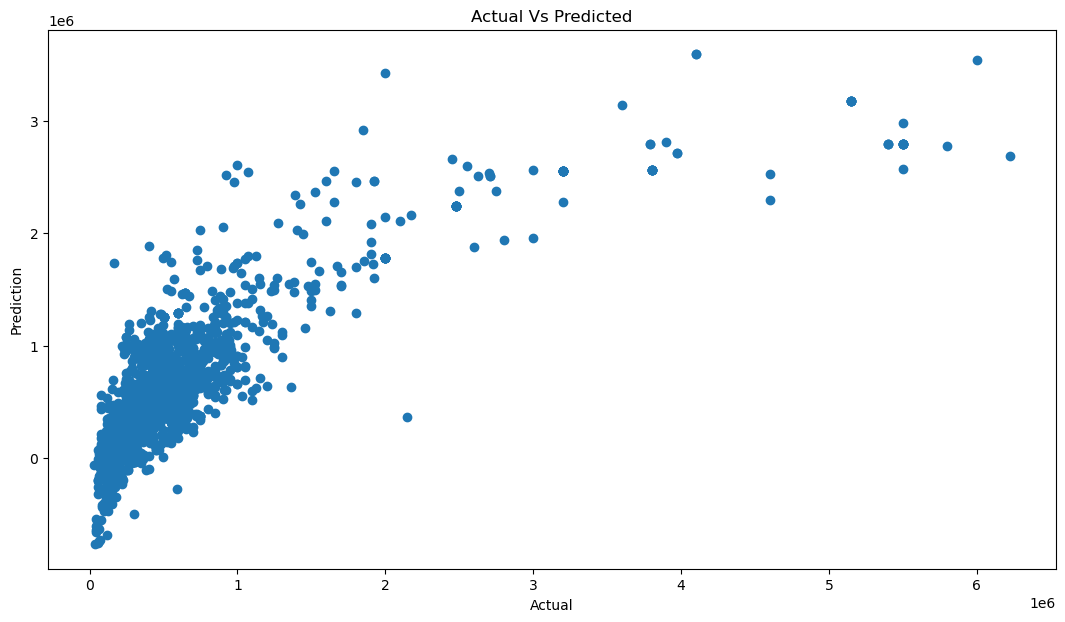

In [33]:
plt.figure(figsize=(13,7))
plt.scatter(Y_test,prediction)
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

mae = mean_absolute_error(Y_test, prediction)
mse = mean_squared_error(Y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, prediction)

print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean squared error:", rmse)
print("R-squared score:", r2)

Mean absolute error: 273268.17588229536
Mean squared error: 206897603325.80603
Root Mean squared error: 454859.98211076565
R-squared score: 0.6809085094703846
